In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 796s 5us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

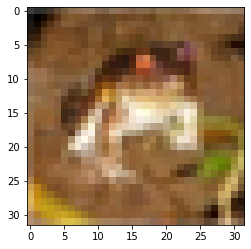

In [5]:
plt.imshow(x_train[0])

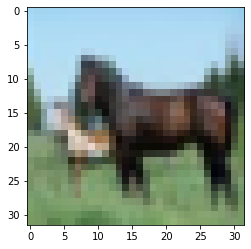

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [13]:
y_test[10]

array([0], dtype=uint8)

In [16]:
model = Sequential()

# Convolutional layer 
model.add(Conv2D(filters=32, 
                 kernel_size=(4,4),
                 input_shape=(32, 32, 3),
                 activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer 
model.add(Conv2D(filters=32, 
                 kernel_size=(4,4),
                 input_shape=(32, 32, 3),
                 activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-06-20 22:06:25.286093: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-20 22:06:25.286774: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
early_stop = EarlyStopping(monitor='vall_loss',
                           patience=2)

In [20]:
model.fit(x_train, 
          y_cat_train, 
          epochs=15,
          validation_data = (x_test, y_cat_test),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 172s 3ms/sample - loss: 1.4969 - accuracy: 0.4571 - val_loss: 1.3783 - val_accuracy: 0.5238
Epoch 2/15
50000/50000 [==============================] - 170s 3ms/sample - loss: 1.1861 - accuracy: 0.5812 - val_loss: 1.1620 - val_accuracy: 0.5969
Epoch 3/15
50000/50000 [==============================] - 161s 3ms/sample - loss: 1.0328 - accuracy: 0.6366 - val_loss: 1.0111 - val_accuracy: 0.6387
Epoch 4/15
50000/50000 [==============================] - 169s 3ms/sample - loss: 0.9246 - accuracy: 0.6754 - val_loss: 0.9664 - val_accuracy: 0.6622
Epoch 5/15
50000/50000 [==============================] - 171s 3ms/sample - loss: 0.8416 - accuracy: 0.7074 - val_loss: 0.9424 - val_accuracy: 0.6704
Epoch 6/15
50000/50000 [==============================] - 171s 3ms/sample - loss: 0.7610 - accuracy: 0.7320 - val_loss: 0.9260 - val_accuracy: 0.6816
Epoch 7/15
50000/50000 [==========================

## Evaluate model 

In [23]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.496881,0.45714,1.378264,0.5238
1,1.186138,0.58120,1.162049,0.5969
2,1.032833,0.63658,1.011060,0.6387
3,0.924634,0.67544,0.966399,0.6622
4,0.841647,0.70744,0.942420,0.6704
5,0.760983,0.73198,0.925957,0.6816
6,0.693261,0.75676,0.984910,0.6764
7,0.630627,0.77882,0.981791,0.6791
8,0.570742,0.79906,0.973527,0.6889
9,0.515025,0.81840,1.044570,0.6743


In [24]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

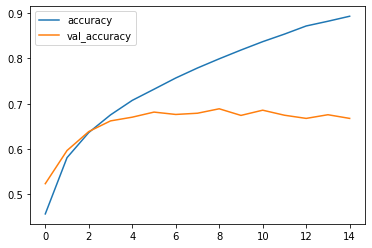

In [43]:
metrics[['accuracy', 'val_accuracy']].plot();

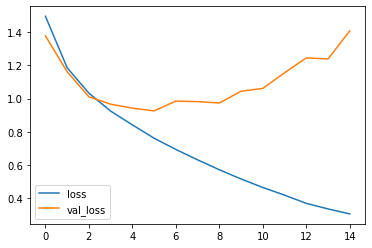

In [42]:
metrics[['loss', 'val_loss']].plot();

In [29]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.4088492788791656, 0.6677]

In [33]:
y_pred = model.predict_classes(x_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.77      0.84      0.80      1000
           2       0.58      0.53      0.55      1000
           3       0.47      0.49      0.48      1000
           4       0.70      0.51      0.59      1000
           5       0.55      0.59      0.57      1000
           6       0.72      0.79      0.76      1000
           7       0.65      0.74      0.69      1000
           8       0.81      0.73      0.77      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



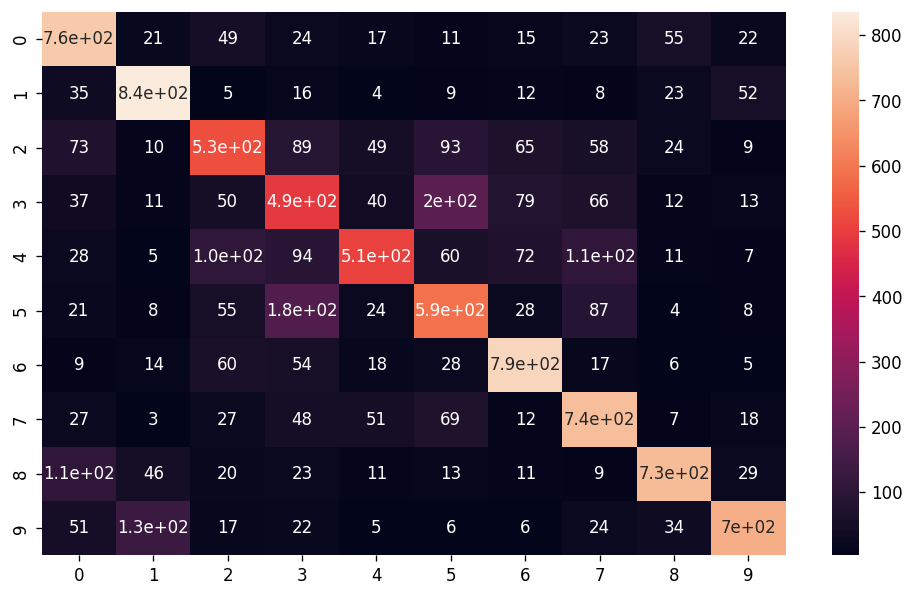

In [41]:
plt.figure(figsize=(10, 6),
           dpi=120)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [44]:
my_image = x_test[30]

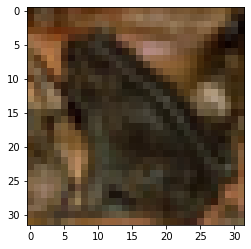

In [46]:
plt.imshow(my_image);

In [47]:
y_test[30]

array([6], dtype=uint8)

In [48]:
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([6])